### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Importing data set, creating data frame and displaying first five rows

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv',sep=',')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 3. Explore data frame

#### a). Data frame shape

In [3]:
df.shape

(32560, 15)

##### Outcome : There are total 32560 rows and 15 columns in data frame.

#### b). Data frame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Outcome : 
* 6 out of 15 columns are of int type. The columns are : 'Age','Fnlwgt','Education_num','Capital_gain','Capital_loss', 'Hours_per_week'.
* 9 out of 15 columns are of object type. The columns are : 'Workclass','Education','Marital_status','Occupation', 'Relationship','Race','Sex','Native_country','Income'.
* There is no null value in the data frame.   

#### c). Cross checking the null values

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### Outcome : There is no null values in data frame.

#### d). Checking the unique values of each column

In [6]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

#### Outcome : As i observed above are the unique values in each column.  

#### e). Checking the values of each columns

In [7]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [8]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

##### Outcome : There is '?' in data frame i need to deal with it in data preprocessing.

In [9]:
df['Fnlwgt'].value_counts()

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [10]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [11]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [12]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

##### Outcome : There is '?' in data frame i need to deal with it in data preprocessing.

In [14]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [15]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [16]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [17]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

##### Outcome : Near about 91% value in this column are '0'. So it is not useful for model.

In [18]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

##### Outcome : Near about 95% value in this column are '0'. So it is not useful for model.

In [19]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

##### Outcome : Lookslike fine. Useful for model.

In [20]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

##### Outcome : There is '?' in data frame i need to deal with it in data preprocessing.

In [21]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

##### Outcome : Lookslike fine. Useful for model.As this is target variable as per problem statement data is also imbalnced.

##### Conclusion :
* 'Workclass','Occupation', & 'Native_country' having '?' need to deal.
* 'Capatial_gain' & 'Capatial_loss' having above 90% value 0 need to drop it.

### 4. Data Preprocessing

#### a). Dealing '?' of Workclass

In [22]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

##### Oucome : As i can see it is categorical values so i am going to replace '?' by mode value

In [23]:
df['Workclass'].mode()

0     Private
dtype: object

In [24]:
df['Workclass'] = df['Workclass'].str.replace('?','Private')

In [25]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### b). Dealing '?' of Occupation

In [26]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

##### Oucome : As i can see it is categorical values so i am going to replace '?' by mode value

In [27]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

In [28]:
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty')

In [29]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

#### c). Dealing '?' of Native_country

In [30]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [31]:
df['Native_country'].mode()

0     United-States
dtype: object

In [32]:
df['Native_country'] = df['Native_country'].str.replace('?','United-States')

In [33]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

#### d). Dropping the unwanted column

In [34]:
df = df.drop(columns=['Capital_gain','Capital_loss'],axis=1)

In [35]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


##### e). Descriptive statical Description

In [36]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


##### Outcome :
* 4 Out of 13 columns are type of int.
* All 4 columns have equal count's so there is no null value.
* mean is greater than 50% in some column which means data is right skew.
* mean is almost equal to 50% in case of 'Education_num' & 'Hours_per_week' which means data is distributed normally the skewness is equal to almost no skewness.
* Difference between 75% and max is high which means outlier's also present in data set.

### 5. Data Visualization of individual variable

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


#### a). Sepearating the int column from dataframe


In [38]:
df1 = df.select_dtypes(exclude='object')
df1

,Age,Fnlwgt,Education_num,Hours_per_week
0,50,83311,13,13
1,38,215646,9,40
2,53,234721,7,40
3,28,338409,13,40
4,37,284582,14,40
...,...,...,...,...
32555,27,257302,12,38
32556,40,154374,9,40
32557,58,151910,9,40
32558,22,201490,9,20


#### b). Visualization using dist plot of numerical columns

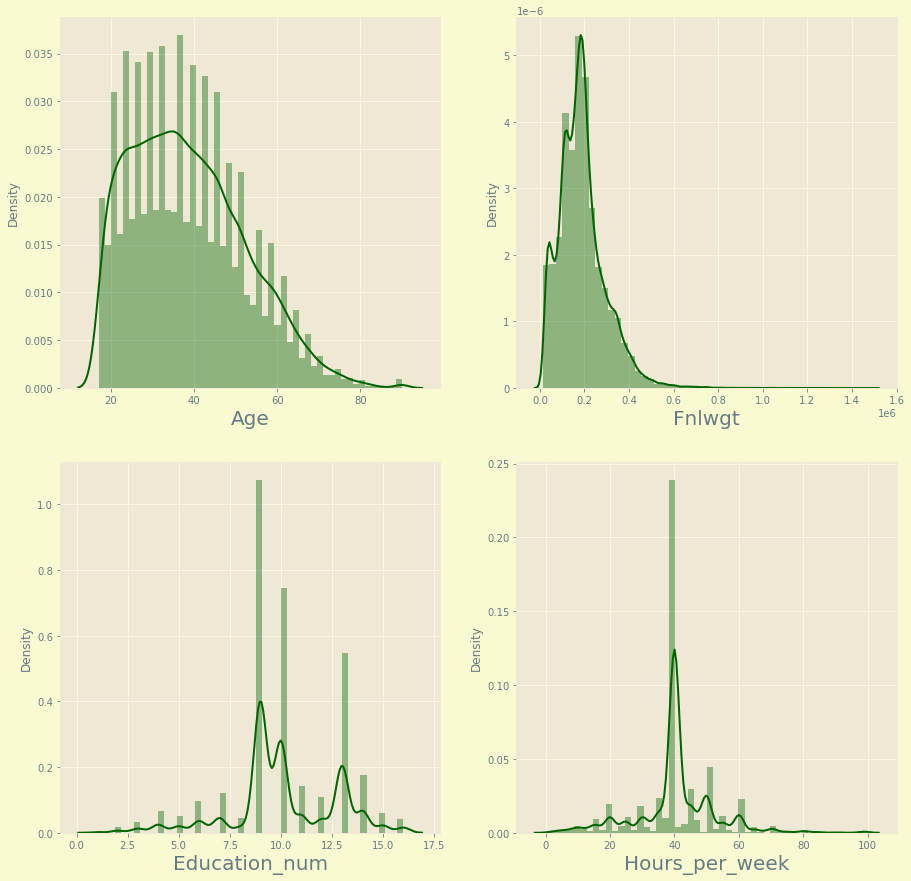

In [39]:
plt.figure(figsize=(15,15),facecolor='LightGoldenrodYellow')
plt.style.use('Solarize_Light2')
plot_no = 1
for i in df1:
    if plot_no<=4:
        ax = plt.subplot(2,2,plot_no)
        sns.distplot(df1[i],color='DarkGreen')
        plt.xlabel(i,fontsize=20)
    plot_no+=1
plt.show()    

#### c). Visualization using hist plot of numerical columns

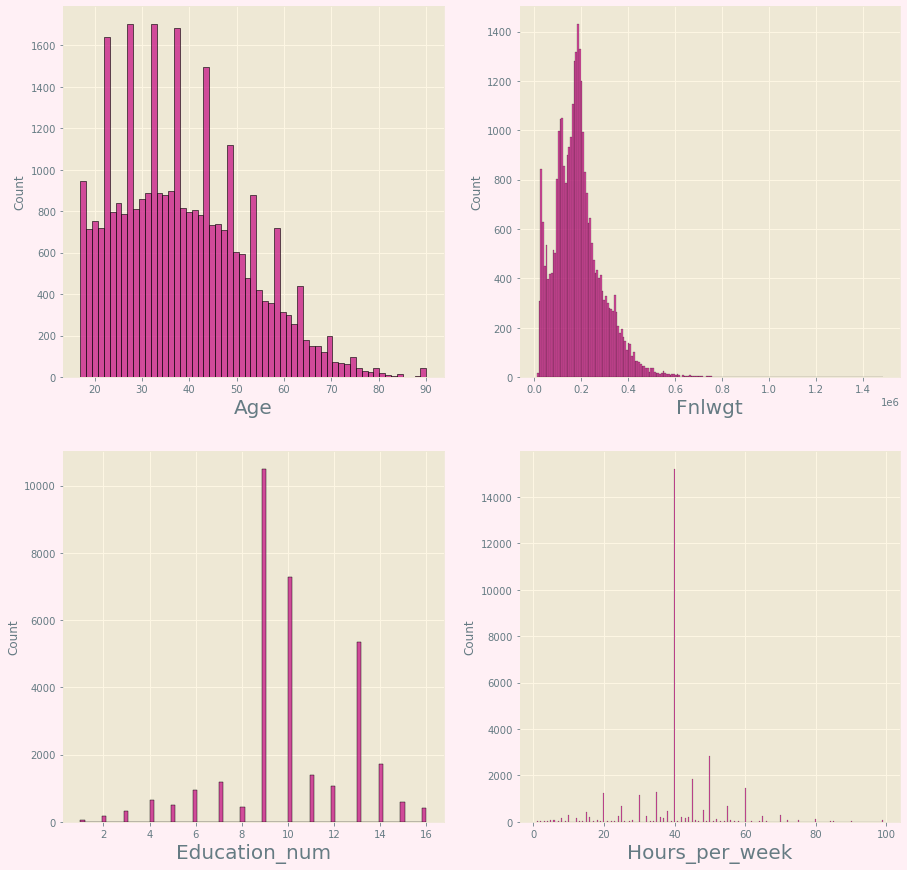

In [40]:
plt.figure(figsize=(15,15),facecolor='LavenderBlush')
plt.style.use('Solarize_Light2')
plot_no = 1
for i in df1:
    if plot_no<=4:
        ax = plt.subplot(2,2,plot_no)
        sns.histplot(df1[i],color='MediumVioletRed')
        plt.xlabel(i,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : From b & c i can observed there are skewness in the data set.

#### d). Visualization using boxplot for checking outlier's

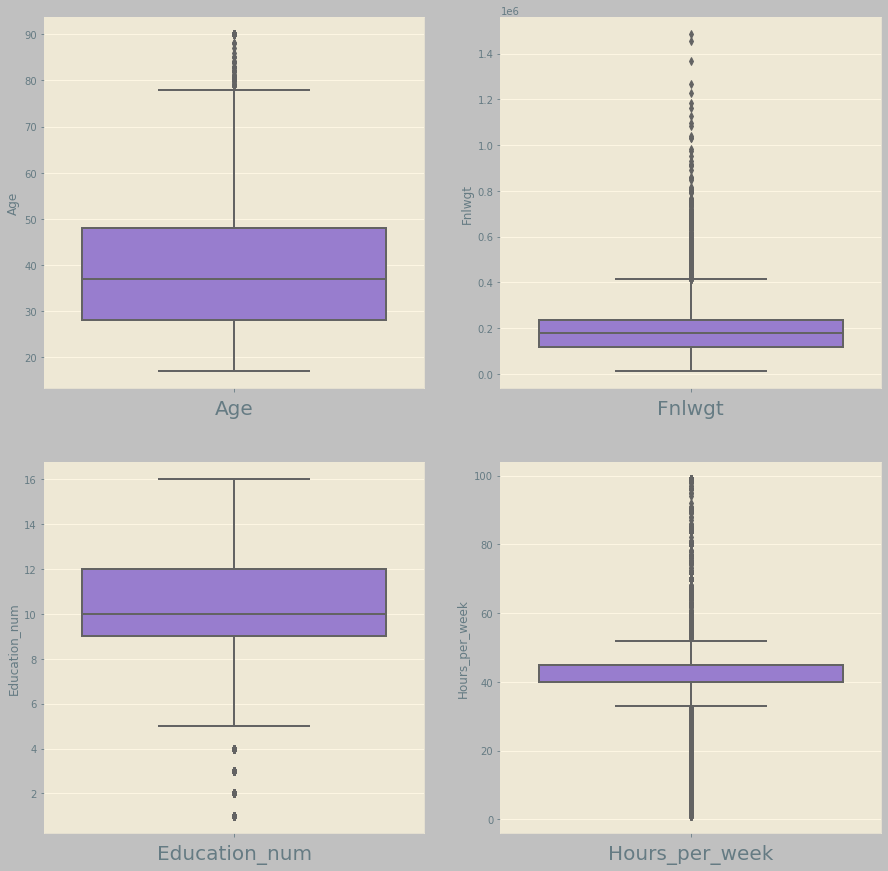

In [41]:
plt.figure(figsize=(15,15),facecolor='Silver')
plt.style.use('Solarize_Light2')
plot_no = 1
for i in df1:
    if plot_no<=4:
        ax = plt.subplot(2,2,plot_no)
        sns.boxplot(y=df1[i],color='MediumPurple')
        plt.xlabel(i,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : Outlier's is also there in the dataset.

#### e). Visualization of categorical columns

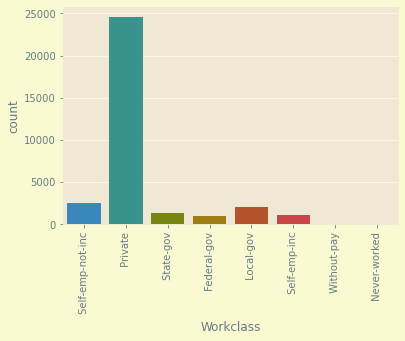

In [42]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Workclass',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly people belong to 'Private' work class and very less people belongs to 'Without pay' & 'Never-worked' work class.

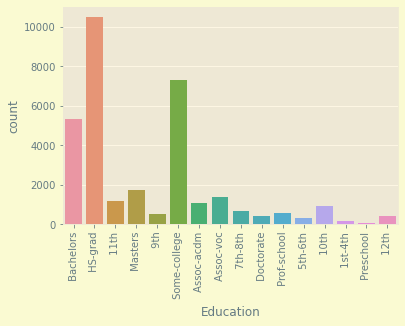

In [43]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Education',data=df)
plt.xticks(rotation=90);

##### Outcome : The higher chances for those who have qualification 'HS-grad',then less for 'Some-college',then less for 'Bachelors' & very less chances for 'Preschool'.

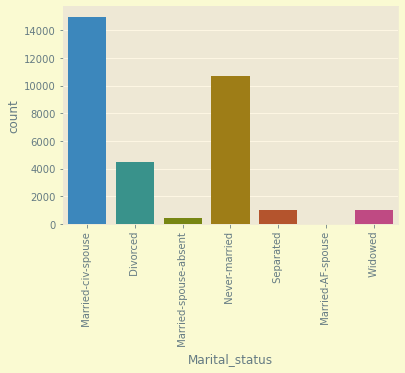

In [44]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Marital_status',data=df)
plt.xticks(rotation=90);

##### Outcome : People having marital status 'Married-civ-spouse' are much,then 'Never-married' & very less having marital status 'Married-AF-spouse'.

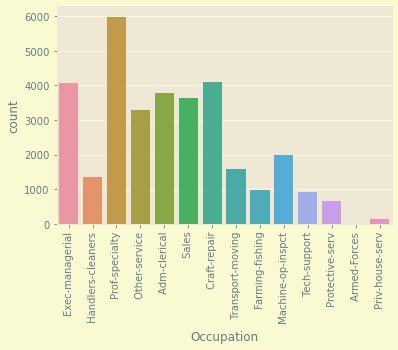

In [45]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Occupation',data=df)
plt.xticks(rotation=90);

##### Outcome : People having occuption 'Prof-specialty' are more in count,then 'Craft-repair',then 'Exec-managerial' .'Armed-Forces' are very less in count. 

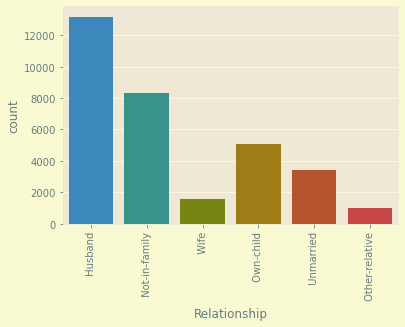

In [46]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Relationship',data=df)
plt.xticks(rotation=90);

##### Outcome : The count for 'Husband' in relationship is high,then 'Not-in-family' & minimum in 'Other-relative'.

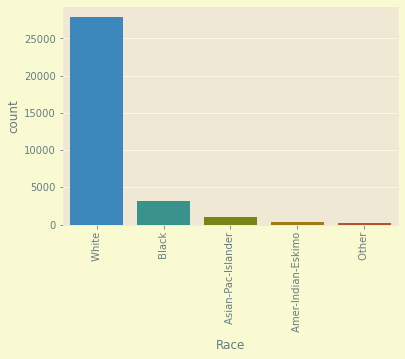

In [47]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Race',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly people are 'White' & very less who are in 'Other' category.

<AxesSubplot:xlabel='Sex', ylabel='count'>

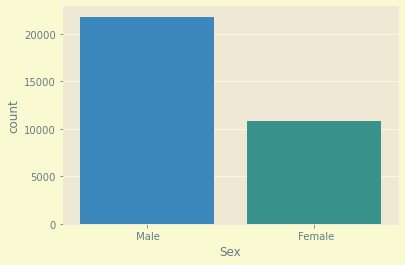

In [48]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Sex',data=df)

##### Outcome : People who are 'Male' have higher count. 

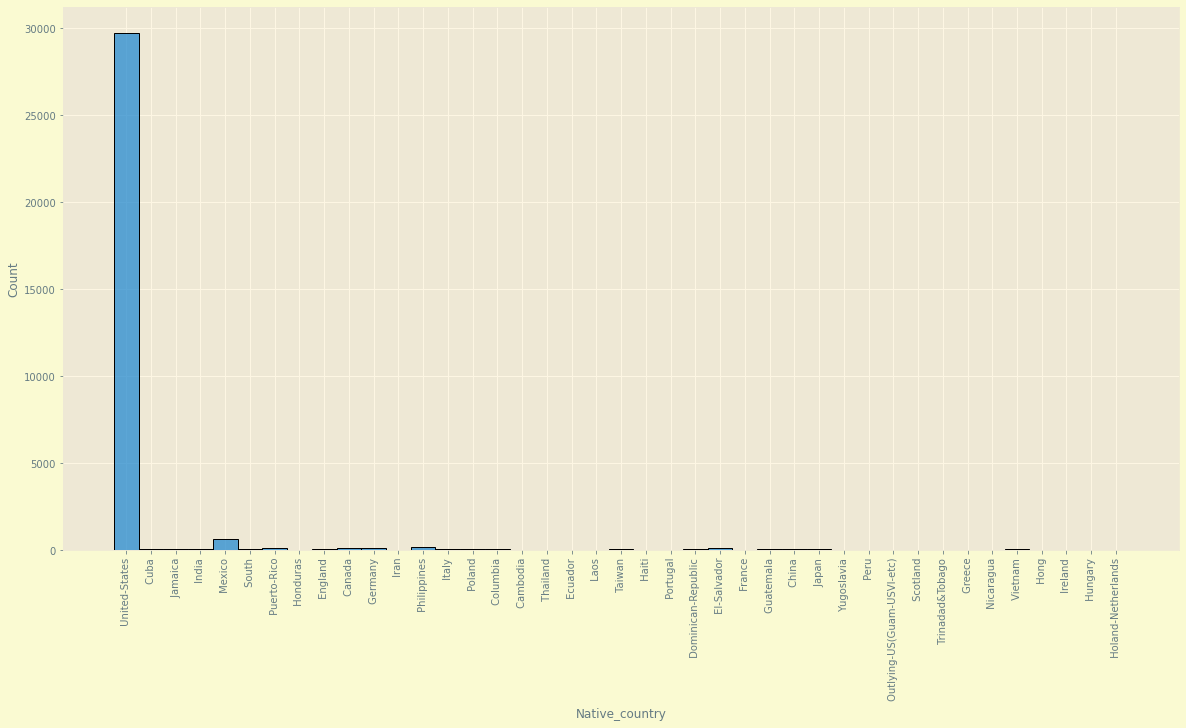

In [49]:
plt.figure(figsize=(20,10),facecolor='LightGoldenrodYellow')
sns.histplot(df['Native_country'])
plt.xticks(rotation=90);

##### Outcome : Most of the people are belongs to 'United States' & Very less are from other's.

<AxesSubplot:xlabel='Income', ylabel='count'>

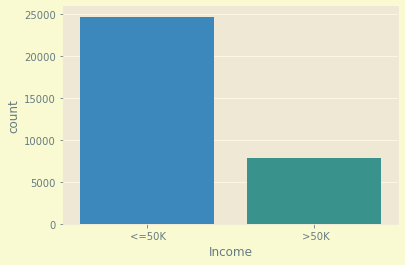

In [50]:
plt.figure(facecolor='LightGoldenrodYellow')
sns.countplot('Income',data=df)

##### Outcome : Most of the people having income '<=50'. Also this is our target variable and data is imbalanced. 

### 6. Data Visualization with respect to target variable

<AxesSubplot:xlabel='Income', ylabel='Age'>

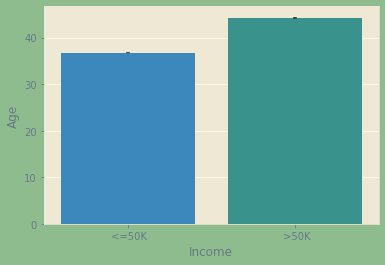

In [51]:
plt.figure(facecolor='DarkSeaGreen')
sns.barplot('Income','Age',data=df)

##### Outcome : Getting >50K is higher as 'Age' is increased. 

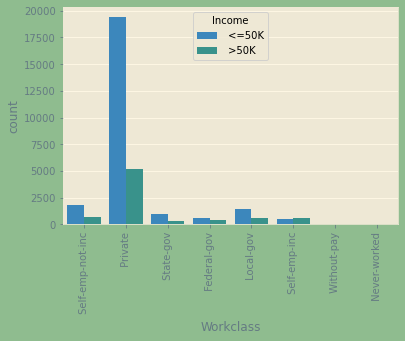

In [52]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Workclass',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly people are from 'Private' work class who earned '<=50K' income.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

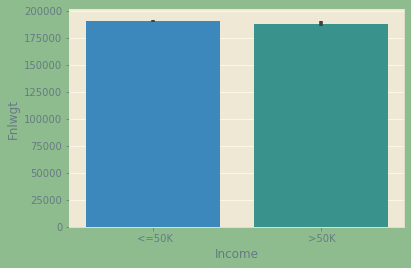

In [53]:
plt.figure(facecolor='DarkSeaGreen')
sns.barplot('Income','Fnlwgt',data=df)

##### Outcome : Chance of getting both type of income is almost same in case of 'Fnlwgt'.

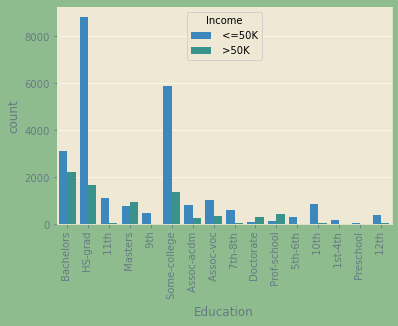

In [54]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Education',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly people are in 'HS-grad' who earned '<=50K' & Majority of people who earned '>50K' are from 'Bachelors'.

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

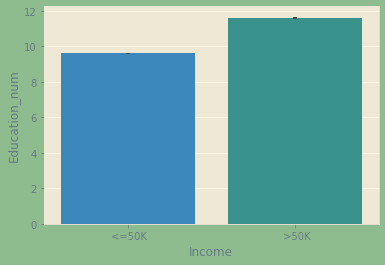

In [55]:
plt.figure(facecolor='DarkSeaGreen')
sns.barplot('Income','Education_num',data=df)

##### Outcome : Getting '>50K' is higher with Education_num 

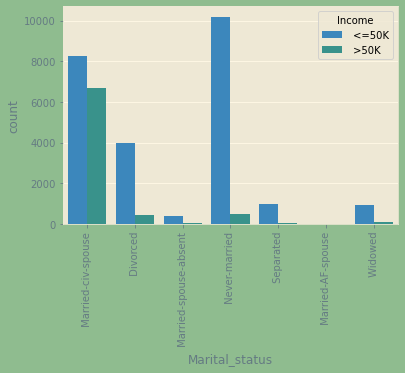

In [56]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Marital_status',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly people are those people who are 'Never-married' and earned '<=50K'. Majority of people who earned '>50K' are from 'Married-civ-spouse'.

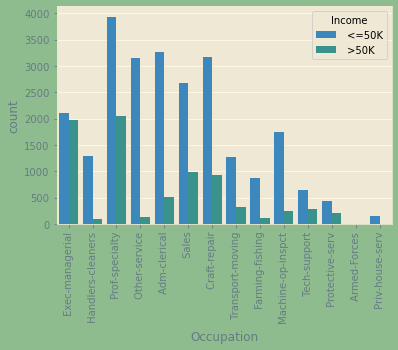

In [57]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Occupation',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Most of the people are from  'Prof-specialty' who earned '<=50K'. Majority who earned  '>50K' are from 'Exec-managerial '.

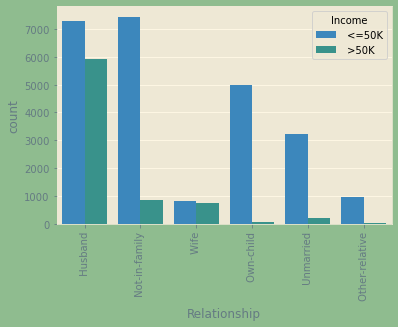

In [58]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Relationship',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Most of them are those who are 'Not-in-family' and earned '<=50K'. Mojority who earned '>50K' are 'Husband'.

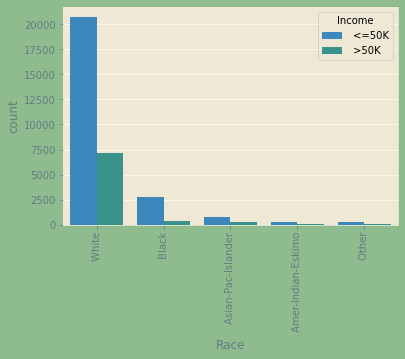

In [59]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Race',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome : Mostly are those who are 'White' and having both type of income.

<AxesSubplot:xlabel='Sex', ylabel='count'>

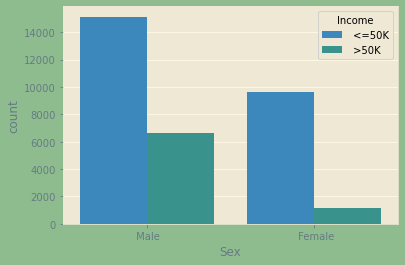

In [60]:
plt.figure(facecolor='DarkSeaGreen')
sns.countplot('Sex',hue='Income',data=df)

##### Outcome : 'Male'  are more compared to 'Female' in counting both type of income.

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

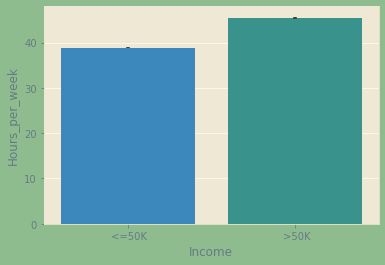

In [60]:
plt.figure(facecolor='DarkSeaGreen')
sns.barplot('Income','Hours_per_week',data=df)

##### Outcome : Getting '>50K' is more as 'Hours_per_week' increased. 

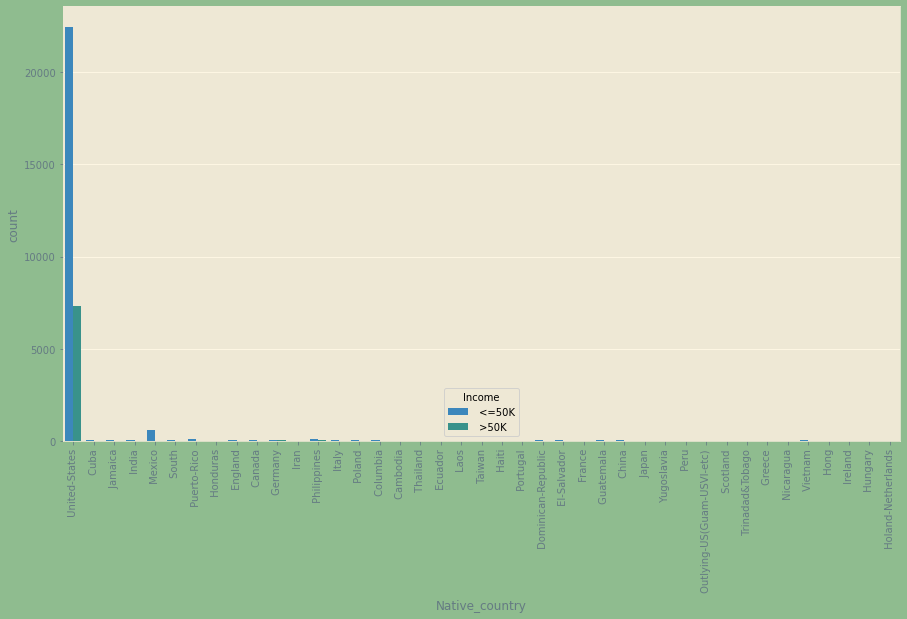

In [61]:
plt.figure(figsize=(15,8),facecolor='DarkSeaGreen')
sns.countplot('Native_country',hue='Income',data=df)
plt.xticks(rotation=90);

##### Outcome :People from 'United-States' having high count for both type of income.

### 7. Feature Engineering

#### a). Dealing with outlier's

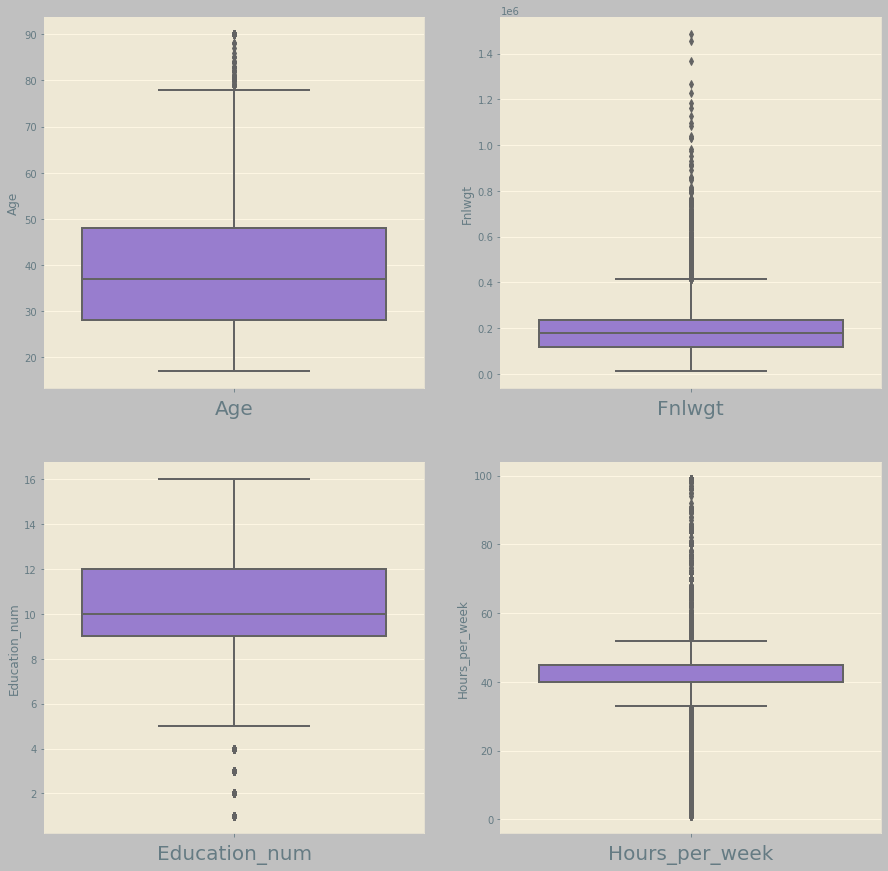

In [62]:
plt.figure(figsize=(15,15),facecolor='Silver')
plt.style.use('Solarize_Light2')
plot_no = 1
for i in df1:
    if plot_no<=4:
        ax = plt.subplot(2,2,plot_no)
        sns.boxplot(y=df1[i],color='MediumPurple')
        plt.xlabel(i,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : Outlier's present in all numerical columns.

In [63]:
from scipy.stats import zscore
z_score = zscore(df[['Age','Fnlwgt', 'Education_num','Hours_per_week']])
print(np.where(z_score>3))

(array([    9,    27,    36,    39,   181,   191,   214,   221,   229,
         271,   298,   311,   413,   429,   507,   519,   588,   650,
         826,   913,   917,   934,   962,  1011,  1039,  1063,  1065,
        1150,  1167,  1171,  1199,  1271,  1290,  1313,  1410,  1416,
        1453,  1499,  1596,  1683,  1729,  1823,  1846,  1882,  1886,
        1928,  1934,  1970,  2014,  2064,  2302,  2332,  2341,  2346,
        2368,  2398,  2428,  2674,  2753,  2759,  2760,  2769,  2823,
        2849,  2890,  2899,  2905,  2919,  2935,  2958,  2962,  2976,
        3091,  3192,  3210,  3224,  3302,  3342,  3408,  3501,  3536,
        3568,  3570,  3577,  3611,  3718,  3737,  3743,  3746,  3748,
        3776,  3869,  3905,  3908,  3962,  3963,  3982,  4059,  4069,
        4085,  4090,  4100,  4108,  4123,  4277,  4293,  4307,  4311,
        4336,  4347,  4440,  4572,  4696,  4728,  4735,  4777,  4833,
        4861,  4972,  5084,  5103,  5241,  5271,  5277,  5290,  5349,
        5368,  5369

In [64]:
z_score = np.abs(zscore(df[['Age','Fnlwgt', 'Education_num','Hours_per_week']]))
df_o = df[(z_score<3).all(axis=1)]
print('The shape before outlier remove is :',df.shape)
print('The shape after outlier remove is :',df_o.shape)
print('The loss of data in percentage is :',(df.shape[0]-df_o.shape[0])/df.shape[0]*100)

The shape before outlier remove is : (32560, 13)
The shape after outlier remove is : (31461, 13)
The loss of data in percentage is : 3.3753071253071254


In [65]:
df_o

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


#### b). Dealing with skewness

In [66]:
df_o.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

##### Outcome : The value that are not in +/-0.5 range will be treated.

In [67]:
from sklearn.preprocessing import PowerTransformer

In [68]:
pt = PowerTransformer(method='yeo-johnson')

In [69]:
test = ['Fnlwgt']

In [70]:
df_o[test] = pt.fit_transform(df_o[test].values)

In [71]:
df_o.skew()

Age               0.472279
Fnlwgt           -0.034507
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

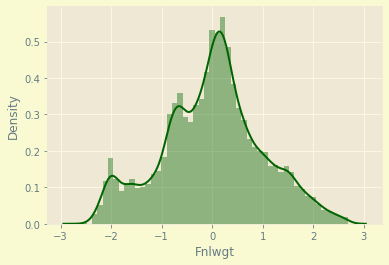

In [72]:
plt.figure(facecolor='LightGoldenrodYellow')
plt.style.use('Solarize_Light2')
sns.distplot(df_o['Fnlwgt'],color='DarkGreen')
plt.show()    

#### c). Label Encoding

In [73]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31461 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             31461 non-null  int64  
 1   Workclass       31461 non-null  object 
 2   Fnlwgt          31461 non-null  float64
 3   Education       31461 non-null  object 
 4   Education_num   31461 non-null  int64  
 5   Marital_status  31461 non-null  object 
 6   Occupation      31461 non-null  object 
 7   Relationship    31461 non-null  object 
 8   Race            31461 non-null  object 
 9   Sex             31461 non-null  object 
 10  Hours_per_week  31461 non-null  int64  
 11  Native_country  31461 non-null  object 
 12  Income          31461 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.4+ MB


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
lb = LabelEncoder()

In [76]:
df_o['Workclass'] =lb.fit_transform(df_o['Workclass'])
df_o['Education'] = lb.fit_transform(df_o['Education'])
df_o['Marital_status'] = lb.fit_transform(df_o['Marital_status'])
df_o['Occupation'] = lb.fit_transform(df_o['Occupation'])
df_o['Relationship'] = lb.fit_transform(df_o['Relationship'])
df_o['Race'] = lb.fit_transform(df_o['Race'])
df_o['Sex'] = lb.fit_transform(df_o['Sex'])
df_o['Native_country'] = lb.fit_transform(df_o['Sex'])
df_o['Income'] = lb.fit_transform(df_o['Income'])

In [77]:
df_o

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,1,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,1,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,1,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,0,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.812145,6,12,2,12,5,4,0,38,0,0
32556,40,3,-0.207385,10,9,2,6,0,4,1,40,1,1
32557,58,3,-0.235114,10,9,6,0,4,4,0,40,0,0
32558,22,3,0.288776,10,9,4,0,3,4,1,20,1,0


In [78]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31461 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             31461 non-null  int64  
 1   Workclass       31461 non-null  int32  
 2   Fnlwgt          31461 non-null  float64
 3   Education       31461 non-null  int32  
 4   Education_num   31461 non-null  int64  
 5   Marital_status  31461 non-null  int32  
 6   Occupation      31461 non-null  int32  
 7   Relationship    31461 non-null  int32  
 8   Race            31461 non-null  int32  
 9   Sex             31461 non-null  int32  
 10  Hours_per_week  31461 non-null  int64  
 11  Native_country  31461 non-null  int64  
 12  Income          31461 non-null  int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 2.4 MB


### 8. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [79]:
df_corr = df_o.corr().abs()
df_corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,0.066519,0.000447,0.053361,0.286424,0.001321,0.268028,0.030679,0.091664,0.097510,0.091664,0.248351
Workclass,0.038024,1.000000,0.021654,0.004652,0.003831,0.020597,0.007551,0.056825,0.046295,0.070095,0.030311,0.070095,0.003494
Fnlwgt,0.066519,0.021654,1.000000,0.024191,0.033150,0.027732,0.001992,0.008287,0.008299,0.025290,0.015566,0.025290,0.004586
Education,0.000447,0.004652,0.024191,1.000000,0.356040,0.039094,0.041224,0.015121,0.015552,0.024911,0.061325,0.024911,0.077526
Education_num,0.053361,0.003831,0.033150,0.356040,1.000000,0.065568,0.073927,0.102497,0.030849,0.016662,0.160483,0.016662,0.337595
Marital_status,0.286424,0.020597,0.027732,0.039094,0.065568,1.000000,0.034640,0.185772,0.067546,0.127375,0.197532,0.127375,0.198475
Occupation,0.001321,0.007551,0.001992,0.041224,0.073927,0.034640,1.000000,0.037549,0.004094,0.047864,0.019943,0.047864,0.034612
Relationship,0.268028,0.056825,0.008287,0.015121,0.102497,0.185772,0.037549,1.000000,0.115216,0.582940,0.263412,0.582940,0.251506
Race,0.030679,0.046295,0.008299,0.015552,0.030849,0.067546,0.004094,0.115216,1.000000,0.088642,0.045331,0.088642,0.072451
Sex,0.091664,0.070095,0.025290,0.024911,0.016662,0.127375,0.047864,0.582940,0.088642,1.000000,0.239039,1.000000,0.216665


#### b). Visualize by heatmap

<AxesSubplot:>

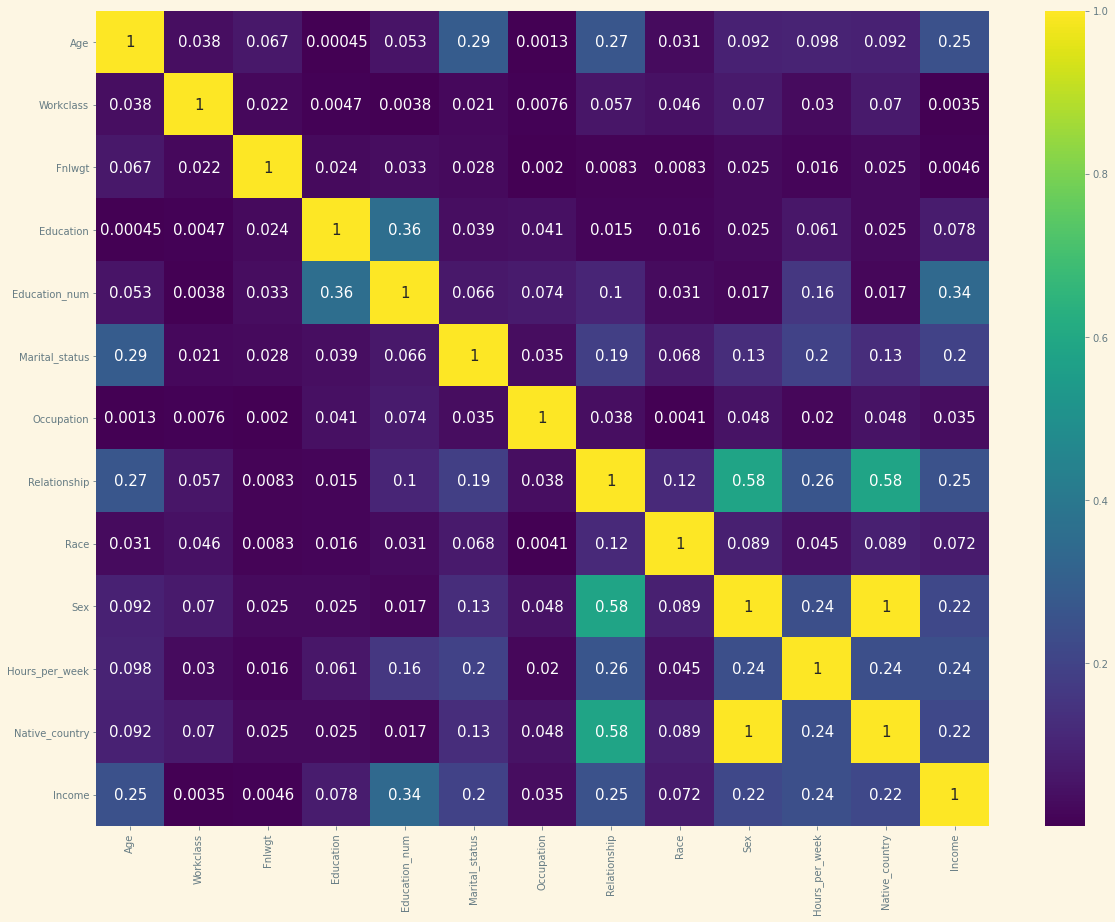

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15},cmap='viridis')

##### Outcome :
* There is no multi colinearity.
* Some features have very less correlation with target.


### 9. Selecting income as y as dependent & rest are as X as independent

In [81]:
y = df_o['Income']
X = df_o.drop(columns='Income',axis=1)

In [82]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,-1.114171,8,13,2,3,0,4,1,13,1
1,38,3,0.427192,10,9,0,5,1,4,1,40,1
2,53,3,0.607320,1,7,2,5,0,2,1,40,1
3,28,3,1.487719,8,13,2,9,5,2,0,40,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.812145,6,12,2,12,5,4,0,38,0
32556,40,3,-0.207385,10,9,2,6,0,4,1,40,1
32557,58,3,-0.235114,10,9,6,0,4,4,0,40,0
32558,22,3,0.288776,10,9,4,0,3,4,1,20,1


In [83]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31461, dtype: int32

### 10. Scaling the X using Standard Scaler

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
ss = StandardScaler()

In [86]:
X_scaled = ss.fit_transform(X)

In [87]:
X_scaled

array([[ 0.87505651,  1.72272339, -1.11417142, ...,  0.70660114,
        -2.42412128,  0.70660114],
       [-0.02534996, -0.08044056,  0.42719161, ...,  0.70660114,
        -0.00836396,  0.70660114],
       [ 1.10015813, -0.08044056,  0.6073202 , ...,  0.70660114,
        -0.00836396,  0.70660114],
       ...,
       [ 1.4753275 , -0.08044056, -0.23511351, ..., -1.41522557,
        -0.00836396, -1.41522557],
       [-1.22589192, -0.08044056,  0.28877559, ...,  0.70660114,
        -1.79781383,  0.70660114],
       [ 1.02512426,  0.82114141,  1.07727454, ..., -1.41522557,
        -0.00836396, -1.41522557]])

### 11. Balancing the target variable using Oversampling

In [88]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
SM = SMOTE()

In [91]:
X_scaled,y = SM.fit_resample(X_scaled,y)

In [92]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

### 12. Observing best random state & split the data using best random state

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [94]:
lr = LogisticRegression()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=i)
    lr.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    accuracy = accuracy_score(y_test,lr_pred_test)
    if accuracy>max_accuracy:
        max_accuracy = accuracy
        max_rs = i
print('Maximum accuracy is :',max_accuracy,'On random state :',max_rs)

Maximum accuracy is : 0.7529045394658043 On random state : 35


In [95]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_scaled, y, test_size=0.25, random_state=max_rs)

In [96]:
print('The shape of X-train is :',X_c_train.shape)
print('The shape of y-train is :',y_c_train.shape)
print('The shape of X-test is :',X_c_test.shape)
print('The shape of y-test is :',y_c_test.shape)

The shape of X-train is : (35779, 12)
The shape of y-train is : (35779,)
The shape of X-test is : (11927, 12)
The shape of y-test is : (11927,)


### 13. Initiate our model

In [97]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score  

#### a). Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
lg =LogisticRegression()
lg.fit(X_c_train,y_c_train)
y_pred_lg = lg.predict(X_c_test)
score_train_lg = lg.score(X_c_train,y_c_train)
score_test_lg = lg.score(X_c_test,y_c_test)
accuracy_score_test_lg = accuracy_score(y_c_test,y_pred_lg)
cr_lg = classification_report(y_c_test,y_pred_lg)
cm_lg = confusion_matrix(y_c_test,y_pred_lg)
print('The score on train of Logistic Regression is:',score_train_lg)
print('The score on test of Logistic Regression is:',score_test_lg)
print('The accuracy score on test of Logistic Regression is:',accuracy_score_test_lg)
print('\n The classification report of Logistic Regression is :\n',cr_lg)
print('\n The Confusion matrix of Logistic Regression is\n',cm_lg)

The score on train of Logistic Regression is: 0.746303697699768
The score on test of Logistic Regression is: 0.7519912802884212
The accuracy score on test of Logistic Regression is: 0.7519912802884212

 The classification report of Logistic Regression is :
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      5942
           1       0.75      0.77      0.76      5985

    accuracy                           0.75     11927
   macro avg       0.75      0.75      0.75     11927
weighted avg       0.75      0.75      0.75     11927


 The Confusion matrix of Logistic Regression is
 [[4390 1552]
 [1406 4579]]


#### Cross-Validation on Logistic Regression

In [100]:
score_lg = cross_val_score(lg,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Logistic Regression is :',score_lg.mean())

Cross Validation score of Logistic Regression is : 0.7460801606525475


#### b). KNeighbors Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
kn = KNeighborsClassifier()
kn.fit(X_c_train,y_c_train)
y_pred_kn = kn.predict(X_c_test)
score_train_kn = kn.score(X_c_train,y_c_train)
score_test_kn = kn.score(X_c_test,y_c_test)
accuracy_score_test_kn = accuracy_score(y_c_test,y_pred_kn)
cr_kn = classification_report(y_c_test,y_pred_kn)
cm_kn = confusion_matrix(y_c_test,y_pred_kn)
print('The score on train of KNeighbors Classifier is:',score_train_kn)
print('The score on test of KNeighbors Classifier is:',score_test_kn)
print('The accuracy score on test of KNeighbors Classifier is:',accuracy_score_test_kn)
print('\n The classification report of KNeighbors Classifier is :\n',cr_kn)
print('\n The Confusion matrix of KNeighbors Classifier is\n',cm_kn)

The score on train of KNeighbors Classifier is: 0.889180804382459
The score on test of KNeighbors Classifier is: 0.8495011318856376
The accuracy score on test of KNeighbors Classifier is: 0.8495011318856376

 The classification report of KNeighbors Classifier is :
               precision    recall  f1-score   support

           0       0.91      0.77      0.84      5942
           1       0.80      0.92      0.86      5985

    accuracy                           0.85     11927
   macro avg       0.86      0.85      0.85     11927
weighted avg       0.86      0.85      0.85     11927


 The Confusion matrix of KNeighbors Classifier is
 [[4598 1344]
 [ 451 5534]]


#### Cross Validation On KNeighbors Classifier

In [103]:
score_kn = cross_val_score(kn,X_c_train,y_c_train,cv=5)
print('Cross Validation score of KNeighbors Classifier is :',score_kn.mean())

Cross Validation score of KNeighbors Classifier is : 0.834316232555578


#### c). Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier()
dt.fit(X_c_train,y_c_train)
y_pred_dt = dt.predict(X_c_test)
score_train_dt = dt.score(X_c_train,y_c_train)
score_test_dt = dt.score(X_c_test,y_c_test)
accuracy_score_test_dt = accuracy_score(y_c_test,y_pred_dt)
cr_dt = classification_report(y_c_test,y_pred_dt)
cm_dt = confusion_matrix(y_c_test,y_pred_dt)
print('The score on train of Decision Tree Classifier is:',score_train_dt)
print('The score on test of Decision Tree Classifier is:',score_test_dt)
print('The accuracy score on test of Decision Tree Classifier is:',accuracy_score_test_dt)
print('\n The classification report of Decision Tree Classifier is :\n',cr_dt)
print('\n The Confusion matrix of Decision Tree Classifier is\n',cm_dt)

The score on train of Decision Tree Classifier is: 1.0
The score on test of Decision Tree Classifier is: 0.8329839859143121
The accuracy score on test of Decision Tree Classifier is: 0.8329839859143121

 The classification report of Decision Tree Classifier is :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5942
           1       0.83      0.83      0.83      5985

    accuracy                           0.83     11927
   macro avg       0.83      0.83      0.83     11927
weighted avg       0.83      0.83      0.83     11927


 The Confusion matrix of Decision Tree Classifier is
 [[4952  990]
 [1002 4983]]


#### Cross Validation On Decision Tree Classifier

In [106]:
score_dt = cross_val_score(dt,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Decision Tree Classifier is :',score_dt.mean())

Cross Validation score of Decision Tree Classifier is : 0.8244221246463461


#### d). Random forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier()
rf.fit(X_c_train,y_c_train)
y_pred_rf = rf.predict(X_c_test)
score_train_rf = rf.score(X_c_train,y_c_train)
score_test_rf = rf.score(X_c_test,y_c_test)
accuracy_score_test_rf = accuracy_score(y_c_test,y_pred_rf)
cr_rf = classification_report(y_c_test,y_pred_rf)
cm_rf = confusion_matrix(y_c_test,y_pred_rf)
print('The score on train of Random Forest Classifier is:',score_train_rf)
print('The score on test of Random Forest Classifier is:',score_test_rf)
print('The accuracy score on test of Random Forest Classifier is:',accuracy_score_test_rf)
print('\n The classification report of Random Forest Classifier is :\n',cr_rf)
print('\n The Confusion matrix of Random Forest Classifier is\n',cm_rf)

The score on train of Random Forest Classifier is: 0.9999720506442327
The score on test of Random Forest Classifier is: 0.885973002431458
The accuracy score on test of Random Forest Classifier is: 0.885973002431458

 The classification report of Random Forest Classifier is :
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5942
           1       0.87      0.90      0.89      5985

    accuracy                           0.89     11927
   macro avg       0.89      0.89      0.89     11927
weighted avg       0.89      0.89      0.89     11927


 The Confusion matrix of Random Forest Classifier is
 [[5171  771]
 [ 589 5396]]


#### Cross Validation On Randomforest Clasifier

In [109]:
score_rf = cross_val_score(rf,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Randomforest Clasifier is :',score_rf.mean())

Cross Validation score of Randomforest Clasifier is : 0.8751222921034241


#### e). Support Vector Classifier

In [110]:
from sklearn.svm import SVC

In [111]:
sm = SVC()
sm.fit(X_c_train,y_c_train)
y_pred_sm = sm.predict(X_c_test)
score_train_sm = sm.score(X_c_train,y_c_train)
score_test_sm = sm.score(X_c_test,y_c_test)
accuracy_score_test_sm = accuracy_score(y_c_test,y_pred_sm)
cr_sm = classification_report(y_c_test,y_pred_sm)
cm_sm = confusion_matrix(y_c_test,y_pred_sm)
print('The score on train of Support Vector Classifier is:',score_train_sm)
print('The score on test of Support Vector Classifier is:',score_test_sm)
print('The accuracy score on test of Support Vector Classifier is:',accuracy_score_test_sm)
print('\n The classification report of Support Vector Classifier is :\n',cr_sm)
print('\n The Confusion matrix of Support Vector Classifier is\n',cm_sm)

The score on train of Support Vector Classifier is: 0.8249252354733223
The score on test of Support Vector Classifier is: 0.8199044185461558
The accuracy score on test of Support Vector Classifier is: 0.8199044185461558

 The classification report of Support Vector Classifier is :
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      5942
           1       0.79      0.88      0.83      5985

    accuracy                           0.82     11927
   macro avg       0.82      0.82      0.82     11927
weighted avg       0.82      0.82      0.82     11927


 The Confusion matrix of Support Vector Classifier is
 [[4513 1429]
 [ 719 5266]]


#### Cross Validation On Support Vector Classifier

In [112]:
score_sm = cross_val_score(sm,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Support Vector Classifier is :',score_sm.mean())

Cross Validation score of Support Vector Classifier is : 0.8167360947540663


#### f). Bagging Classifier

In [113]:
from sklearn.ensemble import BaggingClassifier

In [114]:
bc = BaggingClassifier()
bc.fit(X_c_train,y_c_train)
y_pred_bc = bc.predict(X_c_test)
score_train_bc = bc.score(X_c_train,y_c_train)
score_test_bc = bc.score(X_c_test,y_c_test)
accuracy_score_test_bc = accuracy_score(y_c_test,y_pred_bc)
cr_bc = classification_report(y_c_test,y_pred_bc)
cm_bc = confusion_matrix(y_c_test,y_pred_bc)
print('The score on train of Bagging Classifier is:',score_train_bc)
print('The score on test of Bagging Classifier is:',score_test_bc)
print('The accuracy score on test of Bagging Classifier is:',accuracy_score_test_bc)
print('\n The classification report of Bagging Classifier is :\n',cr_bc)
print('\n The Confusion matrix of Bagging Classifier is\n',cm_bc)

The score on train of Bagging Classifier is: 0.9918946868274686
The score on test of Bagging Classifier is: 0.8752410497191246
The accuracy score on test of Bagging Classifier is: 0.8752410497191246

 The classification report of Bagging Classifier is :
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      5942
           1       0.88      0.87      0.87      5985

    accuracy                           0.88     11927
   macro avg       0.88      0.88      0.88     11927
weighted avg       0.88      0.88      0.88     11927


 The Confusion matrix of Bagging Classifier is
 [[5254  688]
 [ 800 5185]]


#### Cross Validation On Bagging Classifier

In [115]:
score_bc = cross_val_score(bc,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Bagging Classifier is :',score_bc.mean())

Cross Validation score of Bagging Classifier is : 0.8594427823733749


#### g). Gradient Boosting Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gc = GradientBoostingClassifier()
gc.fit(X_c_train,y_c_train)
y_pred_gc = gc.predict(X_c_test)
score_train_gc = gc.score(X_c_train,y_c_train)
score_test_gc = gc.score(X_c_test,y_c_test)
accuracy_score_test_gc = accuracy_score(y_c_test,y_pred_gc)
cr_gc = classification_report(y_c_test,y_pred_gc)
cm_gc = confusion_matrix(y_c_test,y_pred_gc)
print('The score on train of Gradient Boosting Classifier is:',score_train_gc)
print('The score on test of Gradient Boosting Classifier is:',score_test_gc)
print('The accuracy score on test of Gradient Boosting Classifier is:',accuracy_score_test_gc)
print('\n The classification report of Gradient Boosting Classifier is :\n',cr_gc)
print('\n The Confusion matrix of Gradient Boosting Classifier is\n',cm_gc)

The score on train of Gradient Boosting Classifier is: 0.8546074512982476
The score on test of Gradient Boosting Classifier is: 0.8572985662781923
The accuracy score on test of Gradient Boosting Classifier is: 0.8572985662781923

 The classification report of Gradient Boosting Classifier is :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      5942
           1       0.83      0.89      0.86      5985

    accuracy                           0.86     11927
   macro avg       0.86      0.86      0.86     11927
weighted avg       0.86      0.86      0.86     11927


 The Confusion matrix of Gradient Boosting Classifier is
 [[4875 1067]
 [ 635 5350]]


#### Cross Validation On Gradient Boosting Classifier

In [118]:
score_gc = cross_val_score(gc,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Gradient Boosting Classifier is :',score_gc.mean())

Cross Validation score of Gradient Boosting Classifier is : 0.8489616293999476


#### h). AdaBoost Classifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
ac = AdaBoostClassifier()
ac.fit(X_c_train,y_c_train)
y_pred_ac = ac.predict(X_c_test)
score_train_ac = ac.score(X_c_train,y_c_train)
score_test_ac = ac.score(X_c_test,y_c_test)
accuracy_score_test_ac = accuracy_score(y_c_test,y_pred_ac)
cr_ac = classification_report(y_c_test,y_pred_ac)
cm_ac = confusion_matrix(y_c_test,y_pred_ac)
print('The score on train of AdaBoost Classifier is:',score_train_ac)
print('The score on test of AdaBoost Classifier is:',score_test_ac)
print('The accuracy score on test of AdaBoost Classifier is:',accuracy_score_test_ac)
print('\n The classification report of AdaBoost Classifier is :\n',cr_ac)
print('\n The Confusion matrix of AdaBoost Classifier is\n',cm_ac)

The score on train of AdaBoost Classifier is: 0.8362447245590989
The score on test of AdaBoost Classifier is: 0.838517649031609
The accuracy score on test of AdaBoost Classifier is: 0.838517649031609

 The classification report of AdaBoost Classifier is :
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      5942
           1       0.82      0.87      0.84      5985

    accuracy                           0.84     11927
   macro avg       0.84      0.84      0.84     11927
weighted avg       0.84      0.84      0.84     11927


 The Confusion matrix of AdaBoost Classifier is
 [[4812 1130]
 [ 796 5189]]


#### Cross Validation On AdaBoost Classifier

In [121]:
score_ac = cross_val_score(ac,X_c_train,y_c_train,cv=5)
print('Cross Validation score of Gradient Boosting Classifier is :',score_ac.mean())

Cross Validation score of Gradient Boosting Classifier is : 0.8359652570507163


#### i) XGB Boost Classifier

In [122]:
import xgboost as xb

In [123]:
xc = xb.XGBClassifier()
xc.fit(X_c_train,y_c_train)
y_pred_xc = xc.predict(X_c_test)
score_train_xc = xc.score(X_c_train,y_c_train)
score_test_xc = xc.score(X_c_test,y_c_test)
accuracy_score_test_xc = accuracy_score(y_c_test,y_pred_xc)
cr_xc = classification_report(y_c_test,y_pred_xc)
cm_xc = confusion_matrix(y_c_test,y_pred_xc)
print('The score on train of XGB Classifier is:',score_train_xc)
print('The score on test of XGB Classifier is:',score_test_xc)
print('The accuracy score on test of XGB Classifier is:',accuracy_score_test_xc)
print('\n The classification report of XGB Classifier is :\n',cr_xc)
print('\n The Confusion matrix of XGB Classifier is\n',cm_xc)

[13:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score on train of XGB Classifier is: 0.9149780597557227
The score on test of XGB Classifier is: 0.8887398339901065
The accuracy score on test of XGB Classifier is: 0.8887398339901065

 The classification report of XGB Classifier is :
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      5942
           1       0.89      0.89      0.89      5985

    accuracy                           0.89     11927
   macro avg       0.89      0.89      0.89     11927
weighted avg       0.89      0.89      0.89     11927


 The Confusion matrix of XGB Classifier is
 [[5251  691]
 [ 636 5349]]


#### Cross Validation On XGB Classifier

In [124]:
score_xc = cross_val_score(xc,X_c_train,y_c_train,cv=5)
print('Cross Validation score of XGB Classifier is :',score_xc.mean())

[13:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 14. ROC Curve

In [125]:
from sklearn.metrics import plot_roc_curve

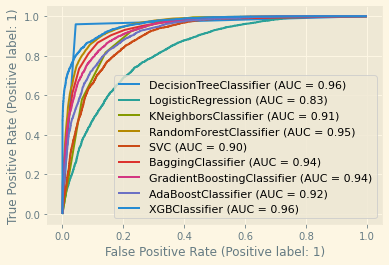

In [126]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lg,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(kn,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(rf,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(sm,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(bc,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(gc,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(ac,X_c_test,y_c_test,ax=disp.ax_)
plot_roc_curve(xc,X_c_test,y_c_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')
plt.show()

##### Outcome : from the above 'Decision Tree Classifier' & 'XGB Classifier' have best score.

### 15. Observing the accuracy & cross validation score of each model

In [127]:
all_score = pd.DataFrame({})
all_score['Model Name'] = ['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Random forest Classifier','Support Vector Classifier','Bagging Classifier','Gradient Boosting Classifier','AdaBoost Classifier','XGB Classifier']

In [128]:
all_score['Train Score'] = [score_train_lg,score_train_kn,score_train_dt,score_train_rf,score_train_sm,score_train_bc,score_train_gc,score_train_ac,score_train_xc]

In [129]:
all_score['Test Score'] = [score_test_lg,score_test_kn,score_test_dt,score_test_rf,score_test_sm,score_test_bc,score_test_gc,score_test_ac,score_test_xc]

In [130]:
all_score['Test Accuracy'] = [accuracy_score_test_lg,accuracy_score_test_kn,accuracy_score_test_dt,accuracy_score_test_rf,accuracy_score_test_sm,accuracy_score_test_bc,accuracy_score_test_gc,accuracy_score_test_ac,accuracy_score_test_xc]

In [131]:
all_score['Cross Validation Score'] = [score_lg.mean(),score_kn.mean(),score_dt.mean(),score_rf.mean(),score_sm.mean(),score_bc.mean(),score_gc.mean(),score_ac.mean(),score_xc.mean()]

Text(0.5, 1.0, 'Train Score Analysis')

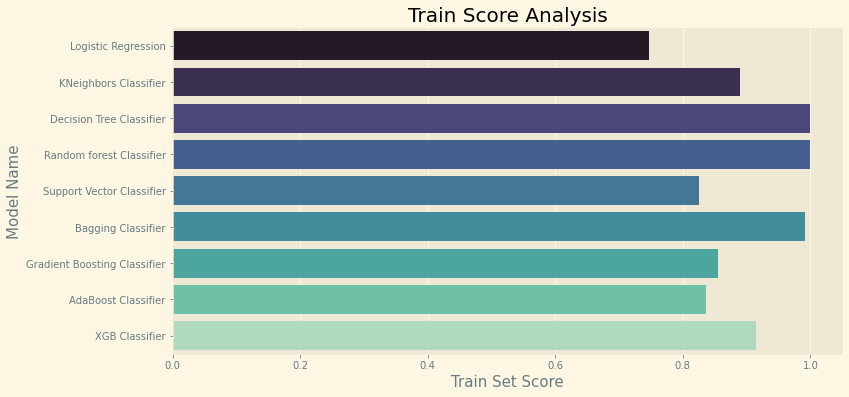

In [132]:
plt.figure(figsize=(12,6))
sns.barplot('Train Score','Model Name',data=all_score,palette = "mako")
plt.xlabel('Train Set Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Train Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Test Score Analysis')

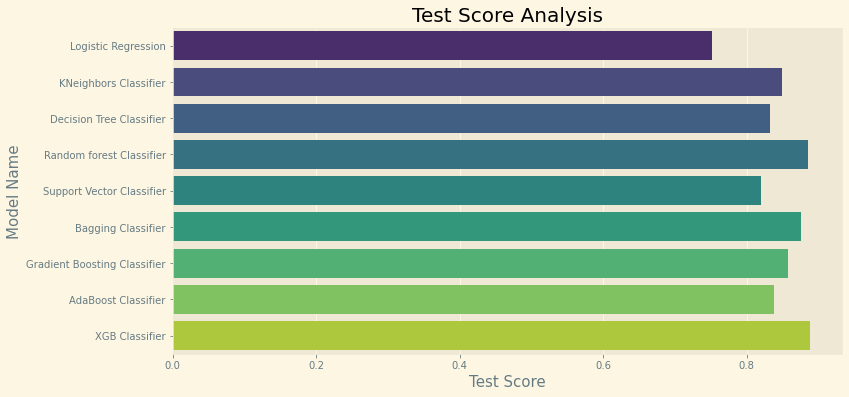

In [133]:
plt.figure(figsize=(12,6))
sns.barplot('Test Score','Model Name',data=all_score,palette = "viridis")
plt.xlabel('Test Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Accuracy Score Analysis')

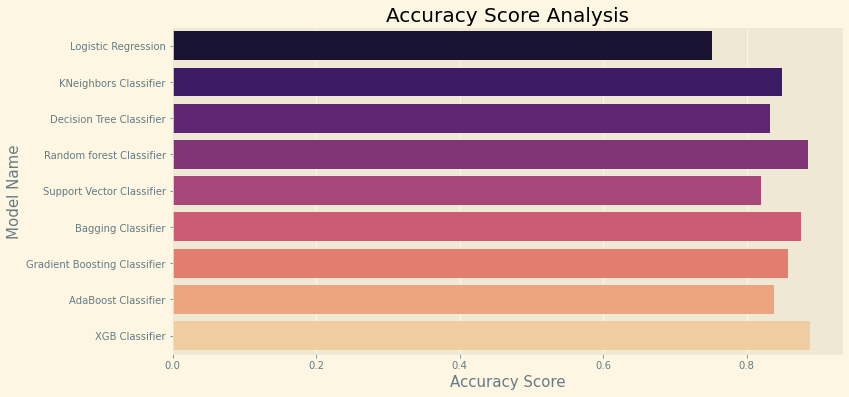

In [134]:
plt.figure(figsize=(12,6))
sns.barplot('Test Accuracy','Model Name',data=all_score,palette = "magma")
plt.xlabel('Accuracy Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Accuracy Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Cross Validation Score Analysis')

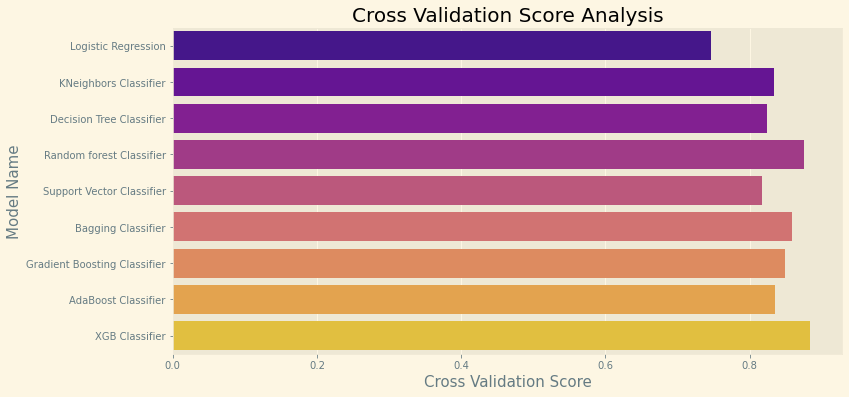

In [135]:
plt.figure(figsize=(12,6))
sns.barplot('Cross Validation Score','Model Name',data=all_score,palette = "plasma")
plt.xlabel('Cross Validation Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Cross Validation Score Analysis',fontsize=20)

In [136]:
all_score

,Model Name,Train Score,Test Score,Test Accuracy,Cross Validation Score
0,Logistic Regression,0.746304,0.751991,0.751991,0.746080
1,KNeighbors Classifier,0.889181,0.849501,0.849501,0.834316
2,Decision Tree Classifier,1.000000,0.832984,0.832984,0.824422
3,Random forest Classifier,0.999972,0.885973,0.885973,0.875122
4,Support Vector Classifier,0.824925,0.819904,0.819904,0.816736
5,Bagging Classifier,0.991895,0.875241,0.875241,0.859443
6,Gradient Boosting Classifier,0.854607,0.857299,0.857299,0.848962
7,AdaBoost Classifier,0.836245,0.838518,0.838518,0.835965
8,XGB Classifier,0.914978,0.888740,0.888740,0.884402


##### Outcome : In 'Decision Tree Classifier' and 'XGB Classifier','XGB Classifier' have better accuracy. Also the difference between accuracy and cv score 'XGB Classifier' has less difference.  

##### Conclusion : 'XGB Classifier' perform better on this dataset for me.

### 16. Hyperparameter Tunning on 'XGB Classifier' using GridSearch CV

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
clf = xb.XGBClassifier()

param = {'learning_rate' : np.arange(0.01,0.8),
         'max_depth' : range(2,30),
         'subsample' : np.arange(0.1,1) 
         }

grd = GridSearchCV(clf,param_grid=param)
grd.fit(X_c_train,y_c_train)


clf = grd.best_estimator_

clf.fit(X_c_train,y_c_train)
y_pred = clf.predict(X_c_test)

ac_con = confusion_matrix(y_c_test,y_pred)

print("\n Best parameter",grd.best_params_)
print("\n Confusion Matrix \n",ac_con)
print("\n Accuracy after hyper parameter tunning",accuracy_score(y_c_test,y_pred))

[13:21:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

##### Outcome : After hyperparameter tunning i am not able to increase the accuracy of model. So default paramenter give me best result on this dataset.

#### 17. Saving the model to a local file system

In [139]:
import pickle

In [140]:
final_result = 'Census Income Project.pickle'
pickle.dump(rf,open(final_result,'wb'))